In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import sklearn as skl
import time
import re
import scipy.optimize as optim

In [3]:
pd.options.mode.chained_assignment = None

In [4]:
path= 'csse_covid_19_data/csse_covid_19_daily_reports'
all_files= glob.glob(path+'/*.csv')
print(all_files)

['csse_covid_19_data/csse_covid_19_daily_reports\\01-22-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\01-23-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\01-24-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\01-25-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\01-26-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\01-27-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\01-28-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\01-29-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\01-30-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\01-31-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\02-01-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\02-02-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\02-03-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\02-04-2020.csv', 'csse_covid_19_data/csse_covid_19_daily_reports\\02-05-2020.csv', 'csse_cov

In [5]:
li =[]
for filename in all_files:
    df = pd.read_csv(filename, header=0 )
    df.rename(columns = {'Last Update': 'Last_Update'},inplace = True)
    df['Last_Update']=filename[-14:-4]
    li.append(df)
frame =pd.concat(li,axis =0, ignore_index = True,sort =True)

In [6]:
frame.tail(20)

,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Deaths,FIPS,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
45904,289.0,NaN,Taiwan*,339.0,NaN,Taiwan*,5.0,NaN,04-02-2020,23.700000,NaN,121.000000,NaN,NaN,NaN,45.0
45905,17.0,NaN,Tanzania,20.0,NaN,Tanzania,1.0,NaN,04-02-2020,-6.369028,NaN,34.888822,NaN,NaN,NaN,2.0
45906,1355.0,NaN,Thailand,1875.0,NaN,Thailand,15.0,NaN,04-02-2020,15.870032,NaN,100.992541,NaN,NaN,NaN,505.0
45907,1.0,NaN,Timor-Leste,1.0,NaN,Timor-Leste,0.0,NaN,04-02-2020,-8.874217,NaN,125.727539,NaN,NaN,NaN,0.0
45908,20.0,NaN,Togo,39.0,NaN,Togo,2.0,NaN,04-02-2020,8.619500,NaN,0.824800,NaN,NaN,NaN,17.0
45909,88.0,NaN,Trinidad and Tobago,94.0,NaN,Trinidad and Tobago,5.0,NaN,04-02-2020,10.691800,NaN,-61.222500,NaN,NaN,NaN,1.0
45910,436.0,NaN,Tunisia,455.0,NaN,Tunisia,14.0,NaN,04-02-2020,33.886917,NaN,9.537499,NaN,NaN,NaN,5.0
45911,17364.0,NaN,Turkey,18135.0,NaN,Turkey,356.0,NaN,04-02-2020,38.963700,NaN,35.243300,NaN,NaN,NaN,415.0
45912,45.0,NaN,Uganda,45.0,NaN,Uganda,0.0,NaN,04-02-2020,1.373333,NaN,32.290275,NaN,NaN,NaN,0.0
45913,856.0,NaN,Ukraine,897.0,NaN,Ukraine,22.0,NaN,04-02-2020,48.379400,NaN,31.165600,NaN,NaN,NaN,19.0


In [7]:
frame.query("Lat == 'NaN' and Latitude =='NaN' and Country_Region =='US'")

,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Deaths,FIPS,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
7859,0.0,Desoto,"Desoto, Florida, US",1.0,NaN,US,0.0,NaN,03-22-2020,NaN,NaN,NaN,NaN,NaN,Florida,0.0
7910,0.0,Brockton,"Brockton, Massachusetts, US",6.0,NaN,US,0.0,NaN,03-22-2020,NaN,NaN,NaN,NaN,NaN,Massachusetts,0.0
7912,0.0,Dukes and Nantucket,"Dukes and Nantucket, Massachusetts, US",1.0,NaN,US,0.0,NaN,03-22-2020,NaN,NaN,NaN,NaN,NaN,Massachusetts,0.0
8097,0.0,Out-of-state,"Out-of-state, Tennessee, US",82.0,NaN,US,0.0,NaN,03-22-2020,NaN,NaN,NaN,NaN,NaN,Tennessee,0.0
8100,0.0,Unknown,"Unknown, Tennessee, US",30.0,NaN,US,0.0,NaN,03-22-2020,NaN,NaN,NaN,NaN,NaN,Tennessee,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45435,0.0,Unassigned,"Unassigned, Wisconsin, US",0.0,NaN,US,5.0,90055.0,04-02-2020,NaN,NaN,NaN,NaN,NaN,Wisconsin,0.0
45674,0.0,NaN,"Diamond Princess, US",49.0,NaN,US,0.0,88888.0,04-02-2020,NaN,NaN,NaN,NaN,NaN,Diamond Princess,0.0
45682,0.0,NaN,"Grand Princess, US",103.0,NaN,US,3.0,99999.0,04-02-2020,NaN,NaN,NaN,NaN,NaN,Grand Princess,0.0
45723,0.0,NaN,"Recovered, US",0.0,NaN,US,0.0,NaN,04-02-2020,NaN,NaN,NaN,NaN,NaN,Recovered,9001.0


In [8]:
columntokeep=['Country_Region','Latitude','Longitude','Province_State']
columtodrop =['Country/Region','Lat','Long_','Province/State']
for colk, cold in zip(columntokeep,columtodrop):
    frame[colk]=frame[colk].fillna(frame[cold])
    frame.drop([cold],axis= 1,inplace=True)

In [9]:
frame[frame['Latitude'].isna()]

,Active,Admin2,Combined_Key,Confirmed,Country_Region,Deaths,FIPS,Last_Update,Latitude,Longitude,Province_State,Recovered
0,NaN,NaN,NaN,1.0,Mainland China,NaN,NaN,01-22-2020,NaN,NaN,Anhui,NaN
1,NaN,NaN,NaN,14.0,Mainland China,NaN,NaN,01-22-2020,NaN,NaN,Beijing,NaN
2,NaN,NaN,NaN,6.0,Mainland China,NaN,NaN,01-22-2020,NaN,NaN,Chongqing,NaN
3,NaN,NaN,NaN,1.0,Mainland China,NaN,NaN,01-22-2020,NaN,NaN,Fujian,NaN
4,NaN,NaN,NaN,NaN,Mainland China,NaN,NaN,01-22-2020,NaN,NaN,Gansu,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
45722,0.0,NaN,"Recovered, Canada",0.0,Canada,0.0,NaN,04-02-2020,NaN,NaN,Recovered,1735.0
45723,0.0,NaN,"Recovered, US",0.0,US,0.0,NaN,04-02-2020,NaN,NaN,Recovered,9001.0
45790,82.0,NaN,Diamond Princess,712.0,Diamond Princess,11.0,NaN,04-02-2020,NaN,NaN,NaN,619.0
45845,7.0,NaN,",,MS Zaandam",9.0,MS Zaandam,2.0,NaN,04-02-2020,NaN,NaN,NaN,0.0


############################################################################################################################
##########################################################################################################################

In [10]:
df =frame.query("Country_Region=='Mainland China' or Country_Region=='China' or Country_Region=='Taiwan' or Country_Region=='Hong Kong'or Country_Region=='US'")

In [11]:
replace=['Mainland China','Taiwan','Hong Kong']
for i in replace:
    df['Country_Region'].replace(i,'China',inplace= True)

In [12]:
df['Country_Region'].value_counts()

US       36894
China     2372
Name: Country_Region, dtype: int64

In [13]:
df.duplicated().any()

False

In [14]:
df=df[['Admin2','Province_State','Country_Region','Last_Update','Confirmed','Deaths','Recovered','Latitude','Longitude']]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39266 entries, 0 to 45923
Data columns (total 9 columns):
Admin2            35243 non-null object
Province_State    39266 non-null object
Country_Region    39266 non-null object
Last_Update       39266 non-null object
Confirmed         39253 non-null float64
Deaths            38964 non-null float64
Recovered         39003 non-null float64
Latitude          37549 non-null float64
Longitude         37549 non-null float64
dtypes: float64(5), object(4)
memory usage: 3.0+ MB


In [16]:
df[['Confirmed','Deaths','Recovered']]=df[['Confirmed','Deaths','Recovered']].apply(lambda x: x.fillna(0))

In [17]:
df[df['Confirmed'].isna()]

,Admin2,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude


In [18]:
columns=['Last_Update','Confirmed','Deaths','Recovered']
for i in columns:
    if i =='Last_Update':
        df[i]=df[i].astype('datetime64')
    else:
        df[i]=df[i].astype('int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39266 entries, 0 to 45923
Data columns (total 9 columns):
Admin2            35243 non-null object
Province_State    39266 non-null object
Country_Region    39266 non-null object
Last_Update       39266 non-null datetime64[ns]
Confirmed         39266 non-null int64
Deaths            39266 non-null int64
Recovered         39266 non-null int64
Latitude          37549 non-null float64
Longitude         37549 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 3.0+ MB


In [20]:
#df=df[df['Province_State']!="Recovered"]

In [21]:
df

,Admin2,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,NaN,Anhui,China,2020-01-22,1,0,0,NaN,NaN
1,NaN,Beijing,China,2020-01-22,14,0,0,NaN,NaN
2,NaN,Chongqing,China,2020-01-22,6,0,0,NaN,NaN
3,NaN,Fujian,China,2020-01-22,1,0,0,NaN,NaN
4,NaN,Gansu,China,2020-01-22,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
45740,NaN,Virgin Islands,US,2020-04-02,30,0,0,18.3358,-64.8963
45742,NaN,Xinjiang,China,2020-04-02,76,3,73,41.1129,85.2401
45744,NaN,Yunnan,China,2020-04-02,183,2,172,24.9740,101.4870
45745,NaN,Zhejiang,China,2020-04-02,1258,1,1228,29.1832,120.0934


In [22]:
df['fatality_rate']= df['Deaths']/df['Confirmed']
df['recovery_rate'] = df['Recovered']/df['Confirmed']

In [23]:
pd.set_option('use_inf_as_na', True)

In [24]:
df[['fatality_rate','recovery_rate']] =df[['fatality_rate','recovery_rate']].apply(lambda x: x.fillna(0))

In [25]:
cndf= df.query('Country_Region=="China"')
usdf=df.query('Country_Region=="US"')

In [26]:
usdf.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude,fatality_rate,recovery_rate
count,36894.000000,36894.000000,36894.000000,36458.000000,36458.000000,36894.000000,36894.000000
mean,41.857131,0.782946,1.000894,37.974854,-90.916558,0.011356,0.016805
std,631.457147,14.385702,81.287625,6.486136,18.032864,0.074581,1.414485
min,0.000000,0.000000,0.000000,-14.271000,-170.132000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,34.481160,-97.859601,0.000000,0.000000
50%,1.000000,0.000000,0.000000,38.296177,-89.758634,0.000000,0.000000
75%,7.000000,0.000000,0.000000,41.708351,-82.965677,0.000000,0.000000
max,51809.000000,1397.000000,9001.000000,69.314792,145.673900,4.000000,171.000000


In [27]:
usdf=usdf[usdf['Province_State']!="Recovered"]

#############################################################################
#############################################################################

In [28]:
usdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36884 entries, 31 to 45923
Data columns (total 11 columns):
Admin2            35243 non-null object
Province_State    36884 non-null object
Country_Region    36884 non-null object
Last_Update       36884 non-null datetime64[ns]
Confirmed         36884 non-null int64
Deaths            36884 non-null int64
Recovered         36884 non-null int64
Latitude          36449 non-null float64
Longitude         36449 non-null float64
fatality_rate     36884 non-null float64
recovery_rate     36884 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 3.4+ MB


In [29]:
usdf[['Longitude','Latitude']]=usdf[['Longitude','Latitude']].replace(0.0,np.nan)

In [30]:
usdf.head(20)

,Admin2,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude,fatality_rate,recovery_rate
31,NaN,Washington,US,2020-01-22,1,0,0,NaN,NaN,0.0,0.0
69,NaN,Washington,US,2020-01-23,1,0,0,NaN,NaN,0.0,0.0
117,NaN,Washington,US,2020-01-24,1,0,0,NaN,NaN,0.0,0.0
118,NaN,Chicago,US,2020-01-24,1,0,0,NaN,NaN,0.0,0.0
158,NaN,Washington,US,2020-01-25,1,0,0,NaN,NaN,0.0,0.0
159,NaN,Illinois,US,2020-01-25,1,0,0,NaN,NaN,0.0,0.0
202,NaN,Washington,US,2020-01-26,1,0,0,NaN,NaN,0.0,0.0
203,NaN,Illinois,US,2020-01-26,1,0,0,NaN,NaN,0.0,0.0
204,NaN,California,US,2020-01-26,2,0,0,NaN,NaN,0.0,0.0
205,NaN,Arizona,US,2020-01-26,1,0,0,NaN,NaN,0.0,0.0


In [31]:
usdf.sort_values(['Province_State'],inplace=True)

In [32]:
usdf[['Longitude','Latitude']]=usdf[['Longitude','Latitude']].fillna(method= 'backfill')

In [33]:
usdf['Latitude'].isna().any()

False

In [34]:
usdf[usdf['Latitude']=='NaN']

C:\Users\victo\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Admin2,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude,fatality_rate,recovery_rate


In [35]:
usdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36884 entries, 3376 to 3983
Data columns (total 11 columns):
Admin2            35243 non-null object
Province_State    36884 non-null object
Country_Region    36884 non-null object
Last_Update       36884 non-null datetime64[ns]
Confirmed         36884 non-null int64
Deaths            36884 non-null int64
Recovered         36884 non-null int64
Latitude          36884 non-null float64
Longitude         36884 non-null float64
fatality_rate     36884 non-null float64
recovery_rate     36884 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 3.4+ MB


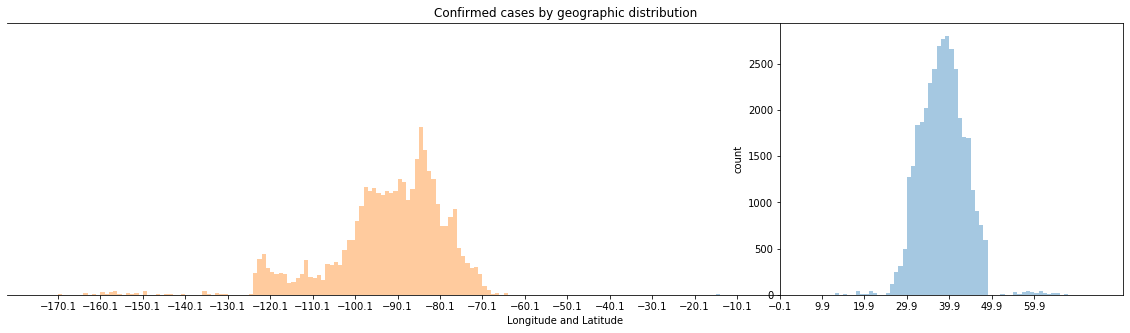

In [36]:
bin_edge=np.arange(usdf['Longitude'].min(), usdf['Latitude'].max(), 1)
plt.figure(figsize=(20,5))
plt.axes().spines['left'].set_position(('data',0))
sns.distplot(usdf['Latitude'],kde=False,bins= bin_edge)
sns.distplot(usdf['Longitude'],kde=False,bins= bin_edge)
ticks= np.arange(usdf['Longitude'].min(), usdf['Latitude'].max(),10)
plt.xticks(ticks)
plt.xlabel('Longitude and Latitude')
plt.ylabel('count')
plt.title('Confirmed cases by geographic distribution');

In [37]:
## states are in different formats
usdf['Province_State']

3376      Norfolk County, MA
3903      Norfolk County, MA
3544      Norfolk County, MA
3213      Norfolk County, MA
3691      Norfolk County, MA
                ...         
16529                Wyoming
4504         Yolo County, CA
3759         Yolo County, CA
4238         Yolo County, CA
3983         Yolo County, CA
Name: Province_State, Length: 36884, dtype: object

In [38]:
## transform to abb
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
len(states)

57

In [39]:
def trans(x):
    for abb, state in states.items():
        if x==state:
            x=abb
        else:
            x
    return x 

In [40]:
usdf['Province_State']=usdf['Province_State'].apply(lambda x: trans(x))

In [41]:
usdf['Province_State'].unique()

array([' Norfolk County, MA', 'AL', 'Alameda County, CA', 'AK', 'AS',
       'AZ', 'AR', 'Ashland, NE', 'Bennington County, VT',
       'Bergen County, NJ', 'Berkeley, CA', 'Berkshire County, MA',
       'Boston, MA', 'Broward County, FL', 'CA', 'Carver County, MN',
       'Charleston County, SC', 'Charlotte County, FL',
       'Chatham County, NC', 'Cherokee County, GA', 'Chicago',
       'Chicago, IL', 'Clark County, NV', 'Clark County, WA',
       'Cobb County, GA', 'Collin County, TX', 'CO', 'CT',
       'Contra Costa County, CA', 'Cook County, IL',
       'Davidson County, TN', 'Davis County, UT', 'DE',
       'Delaware County, PA', 'Denver County, CO', 'Diamond Princess',
       'DC', 'Douglas County, CO', 'Douglas County, NE',
       'Douglas County, OR', 'El Paso County, CO', 'Fairfax County, VA',
       'Fairfield County, CT', 'Fayette County, KY', 'FL',
       'Floyd County, GA', 'Fort Bend County, TX', 'Fresno County, CA',
       'Fulton County, GA', 'GA', 'Grafton County, N

In [42]:
## cut off *, 
def cutoff(x):
    if re.match(r"\D+[,]\D+", x):
        x =x.split(', ',2)[1]
    else:
        x
    return x

In [43]:
cutoff("Tempe, AZ")

'AZ'

In [44]:
usdf['Province_State']=usdf['Province_State'].apply(lambda x: cutoff(x))

In [45]:
usdf['Province_State'].unique()

array(['MA', 'AL', 'CA', 'AK', 'AS', 'AZ', 'AR', 'NE', 'VT', 'NJ', 'FL',
       'MN', 'SC', 'NC', 'GA', 'Chicago', 'IL', 'NV', 'WA', 'TX', 'CO',
       'CT', 'TN', 'UT', 'DE', 'PA', 'Diamond Princess', 'DC', 'OR', 'VA',
       'KY', 'NH', 'Grand Princess', 'Grand Princess Cruise Ship', 'GU',
       'MD', 'HI', 'IN', 'ID', 'IA', 'OR ', 'LA', 'KS',
       'TX (From Diamond Princess)', 'WI', 'ME', 'MI', 'MS', 'MO', 'MT',
       'NY', 'NM', 'ND', 'MP', 'OH', 'OK', 'NE (From Diamond Princess)',
       'RI', 'PR', 'SD', 'CA (From Diamond Princess)', 'US',
       'Unassigned Location (From Diamond Princess)',
       'United States Virgin Islands', 'VI', 'U.S.', 'D.C.', 'WV',
       'Wuhan Evacuee', 'WY'], dtype=object)

In [46]:
mostupdate=usdf['Last_Update'].max().strftime('%Y-%m-%d')
mask=usdf[usdf['Last_Update']==mostupdate]

In [47]:
mask

,Admin2,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Latitude,Longitude,fatality_rate,recovery_rate
43870,Cullman,AL,US,2020-04-02,9,1,0,34.130203,-86.868880,0.111111,0.0
45387,Tuscaloosa,AL,US,2020-04-02,34,0,0,33.287261,-87.525568,0.000000,0.0
45397,Unassigned,AL,US,2020-04-02,0,5,0,32.220683,-86.209693,0.000000,0.0
43727,Chilton,AL,US,2020-04-02,14,0,0,32.850441,-86.717326,0.000000,0.0
45482,Walker,AL,US,2020-04-02,34,0,0,33.802705,-87.300272,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
45393,Uinta,WY,US,2020-04-02,1,0,0,41.287818,-110.547578,0.000000,0.0
45351,Teton,WY,US,2020-04-02,29,0,0,43.935225,-110.589080,0.000000,0.0
44952,Park,WY,US,2020-04-02,1,0,0,44.521575,-109.585283,0.000000,0.0
45923,unassigned,WY,US,2020-04-02,0,0,0,42.961801,-106.797885,0.000000,0.0


In [48]:
comfirmbystate=mask.groupby(['Province_State'])['Confirmed'].sum().sort_values(ascending=False)
deathbystate  =mask.groupby(['Province_State'])['Deaths'].sum().sort_values(ascending=False)
fatalitybystate=mask.groupby(['Province_State'])['fatality_rate'].mean().sort_values(ascending=False)

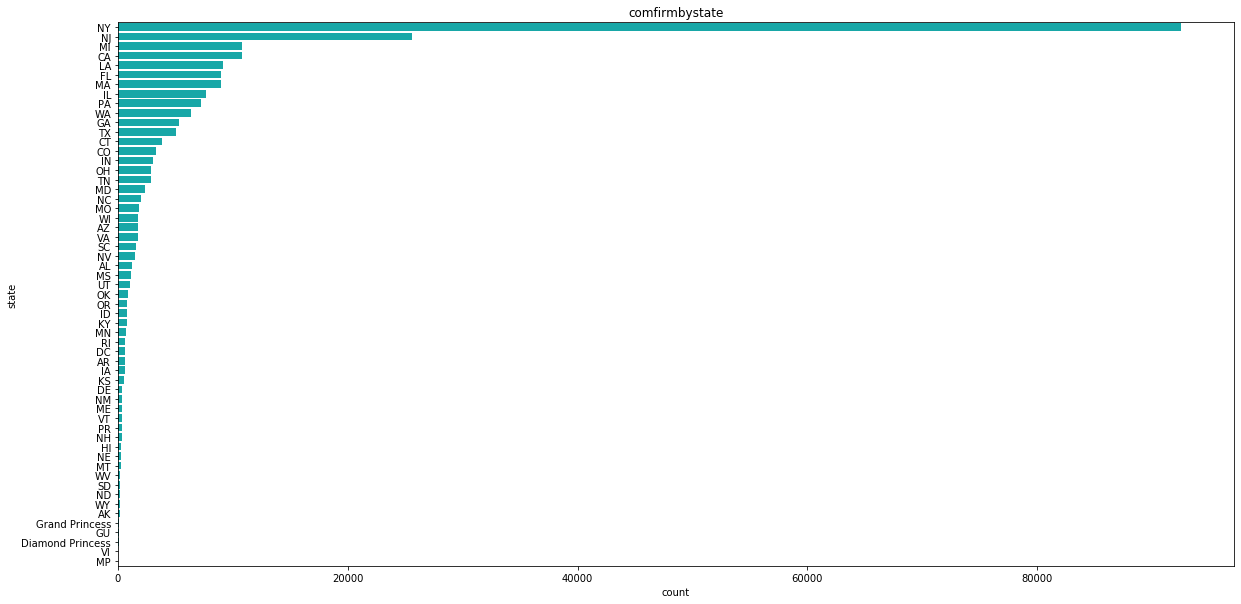

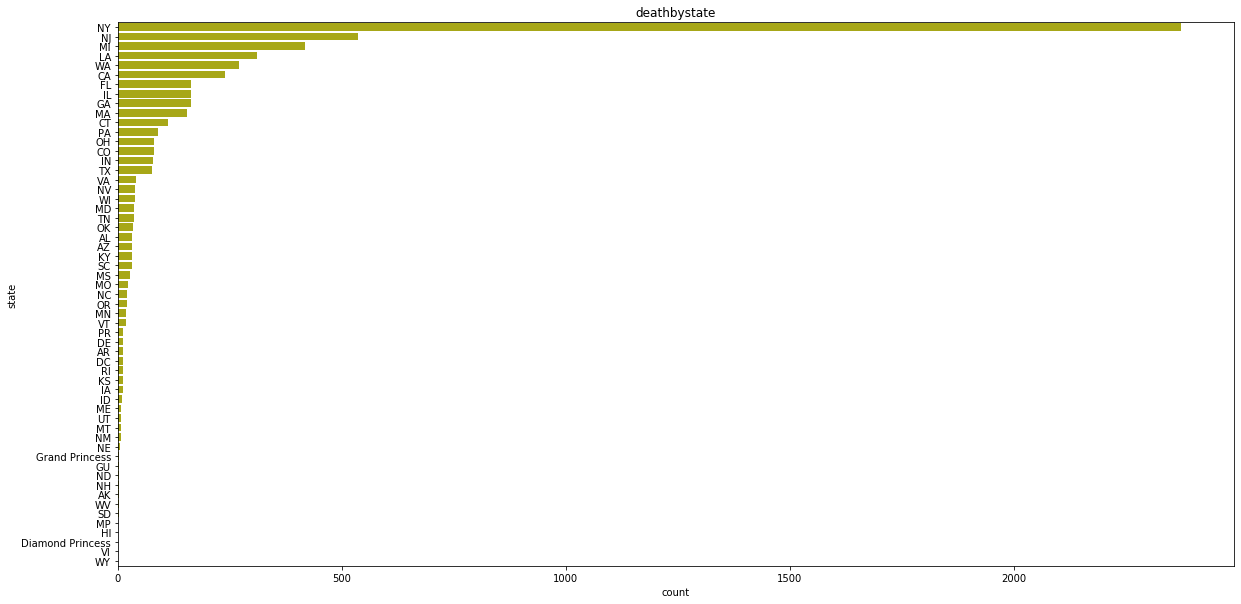

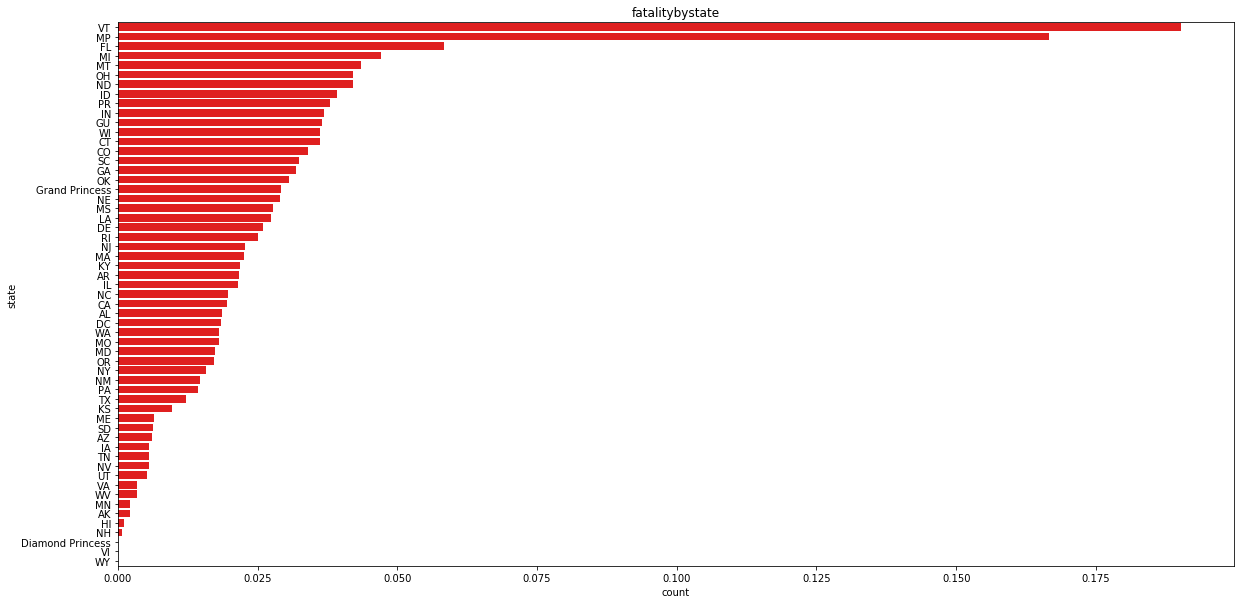

In [49]:
categories =[comfirmbystate,deathbystate,fatalitybystate]
color = ['c','y','r']
titles=['comfirmbystate','deathbystate','fatalitybystate']
for ca, co, ti in zip(categories,color,titles):
    plt.figure(figsize =(20,10))
    sns.barplot(y = ca.index, x= ca.values, color =co)
    plt.xlabel('count')
    plt.ylabel('state')
    plt.title(ti);

In [50]:
usdata = usdf.groupby(['Last_Update'])['Confirmed'].sum()

C:\Users\victo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


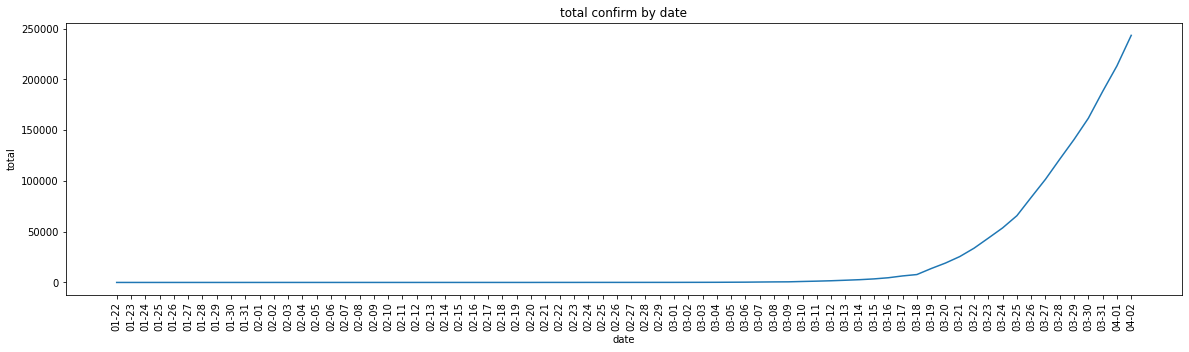

In [51]:
plt.figure(figsize=(20,5))
sns.lineplot(x=usdata.index,y=usdata.values)
plt.ylabel('total')
plt.xlabel('date')
plt.title('total confirm by date')
ticks =np.array([i.strftime('%m-%d') for i in usdata.index])
plt.xticks(ticks=usdata.index, labels=ticks,rotation=90);

In [52]:
twocountry=df.groupby(['Country_Region','Last_Update'])[['Confirmed','Deaths','Recovered']].sum()

In [53]:
twocountry.reset_index(inplace=True)

In [54]:
twocountry

,Country_Region,Last_Update,Confirmed,Deaths,Recovered
0,China,2020-01-22,548,17,28
1,China,2020-01-23,642,18,30
2,China,2020-01-24,921,26,36
3,China,2020-01-25,1407,42,39
4,China,2020-01-26,2074,56,49
...,...,...,...,...,...
139,US,2020-03-29,140886,2467,2665
140,US,2020-03-30,161807,2978,5644
141,US,2020-03-31,188172,3873,7024
142,US,2020-04-01,213372,4757,8474


In [55]:
def logtrans(x, inverse=False):
    if not inverse:
        x= np.log10(x)
    else:
        x =10**x
    return x

C:\Users\victo\Anaconda3\lib\site-packages\seaborn\relational.py:740: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  scout, = ax.plot([], [], **kws)
C:\Users\victo\Anaconda3\lib\site-packages\seaborn\relational.py:784: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  line, = ax.plot([], [], **kws)


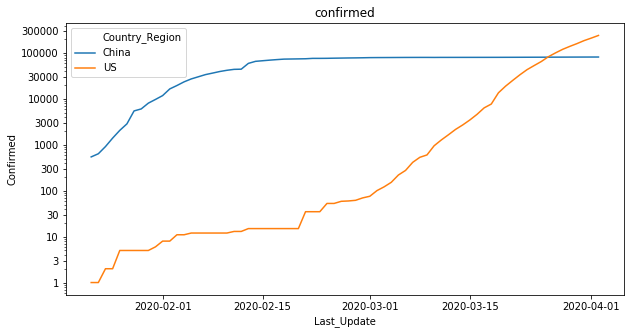

In [56]:
plt.figure(figsize=(10,5))
plt.yscale('log')
tick=[1,3,10,30,100,300,1000,3000,10000,30000,100000,300000]
plt.yticks(ticks =tick, labels =tick)
sns.lineplot(data=twocountry,x ='Last_Update',y='Confirmed',hue='Country_Region')
plt.legend(loc=0)
plt.title('confirmed');

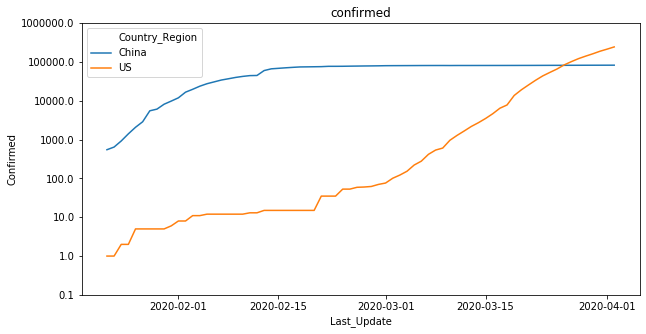

In [57]:
plt.figure(figsize=(10,5))
#plt.yscale('log')
#plt.yticks(ticks =tick, labels =tick)
sns.lineplot(data=twocountry,x ='Last_Update'
             ,y=twocountry['Confirmed'].apply(logtrans),hue='Country_Region')
loc,label=plt.yticks()
tick=logtrans(loc,inverse=True)
plt.yticks(ticks=loc,labels=tick)
plt.legend(loc=0)
plt.title('confirmed');

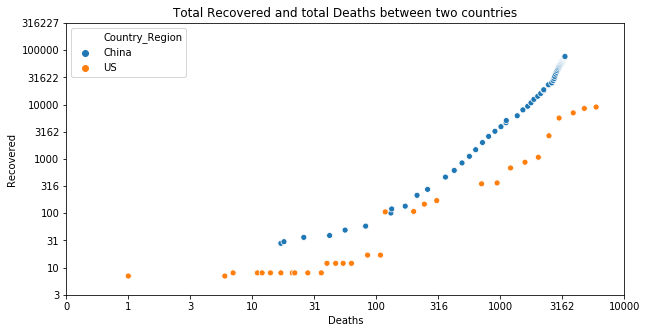

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=twocountry,x=twocountry['Deaths'].apply(logtrans),
                y=twocountry['Recovered'].apply(logtrans),hue='Country_Region')
plt.legend(loc=0)
yloc,ylabel= plt.yticks()
xloc,xlabel= plt.xticks()
ylabel=logtrans(yloc,inverse=True).astype(int)
xlabel=logtrans(xloc,inverse=True).astype(int)
plt.yticks(ticks =yloc,labels=ylabel)
plt.xticks(ticks=xloc,labels = xlabel)
plt.title('Total Recovered and total Deaths between two countries');

In [59]:
twocountry['fatality_rate'] = twocountry['Deaths']/twocountry['Confirmed']
twocountry['recovery_rate'] = twocountry['Recovered']/twocountry['Confirmed']
twocountry

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,fatality_rate,recovery_rate
0,China,2020-01-22,548,17,28,0.031022,0.051095
1,China,2020-01-23,642,18,30,0.028037,0.046729
2,China,2020-01-24,921,26,36,0.028230,0.039088
3,China,2020-01-25,1407,42,39,0.029851,0.027719
4,China,2020-01-26,2074,56,49,0.027001,0.023626
...,...,...,...,...,...,...,...
139,US,2020-03-29,140886,2467,2665,0.017511,0.018916
140,US,2020-03-30,161807,2978,5644,0.018405,0.034881
141,US,2020-03-31,188172,3873,7024,0.020582,0.037328
142,US,2020-04-01,213372,4757,8474,0.022294,0.039715


In [60]:
## up to date rate
uptodate =twocountry[twocountry['Last_Update']==twocountry['Last_Update'].max()]
uptodate 

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,fatality_rate,recovery_rate
71,China,2020-04-02,82432,3322,76565,0.040300,0.928826
143,US,2020-04-02,243453,5926,9001,0.024341,0.036972


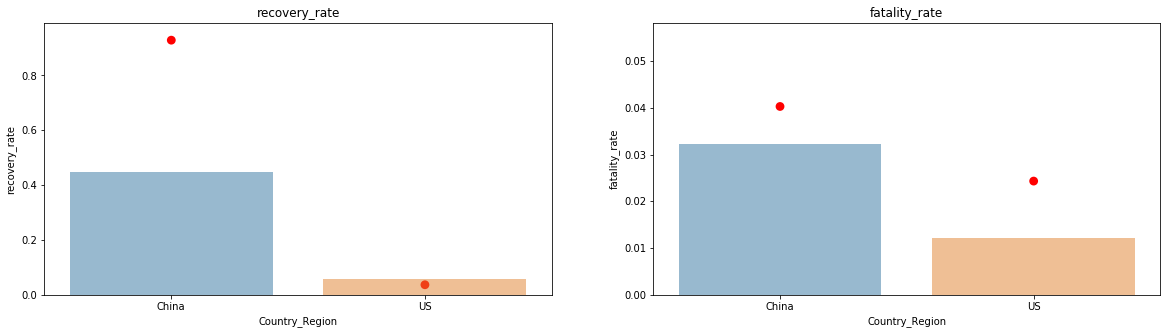

In [61]:
ratios=['recovery_rate','fatality_rate',]
plotpos= [121,122]
plt.figure(figsize=(20,5))
for ra,pl in zip(ratios,plotpos):
    plt.subplot(pl)
    sns.pointplot(data=uptodate,x='Country_Region',y=ra,join=False,color='r')
    sns.barplot(data=twocountry, x='Country_Region', y= ra, alpha= 0.5,ci=False)
    plt.title(ra);

#############################################################################
#############################################################################

In [62]:
dummy =twocountry.query("Country_Region == 'US'")

In [63]:
def get_date_list(target_month):
    month_day=['offbyone',31,29,31,30,31,30,31,31,30,31,30,31]
    cur_month, cur_day =1,22
    ans=[]
    while cur_month<=target_month:
        while cur_day <= month_day[cur_month]:
            if cur_day<10:
                d= '0'+ str(cur_day)
            else:
                d =str(cur_day)
            ans.append(str(cur_month)+'-'+d)
            cur_day += 1
        cur_day =1
        cur_month +=1
    return ans

In [64]:
get_date_list(1)

['1-22',
 '1-23',
 '1-24',
 '1-25',
 '1-26',
 '1-27',
 '1-28',
 '1-29',
 '1-30',
 '1-31']

In [65]:
def logistic_function(t,a,r0,capacity):
    return capacity/(1+a*np.exp(-r0*t))

> r0 need to be smaller than the bounds set

In [110]:
## r0 need to be smaller than the bounds set
p0=np.random.exponential(size=3)
p0

array([1.14659362, 3.22056845, 2.02156878])

In [117]:
### a bounds is capacity -1, r0 is 3.5, capacity is population of U.S.
bounds=(0,[5559999,3.5,331002651])

In [137]:
def predict(predict_days):
    confirmed = dummy['Confirmed'].values
    date = dummy['Last_Update'].values
    x= np.arange(len(date))
    date_lables= get_date_list(12)
    
    ## fitcurve
    (a,r0,capacity),cov= optim.curve_fit(logistic_function,x,confirmed,
                                         bounds= bounds,p0=p0,absolute_sigma =True)
    print(a,r0,capacity)
    predict_x = list(x)+[x[-1]+ i for i in range(1, 1+predict_days)]
    predict_x =np.array(predict_x)
    pretict_y =logistic_function(predict_x,a,r0,capacity)
    
    ## plot
    plt.figure(figsize=(20,10))
    plt.plot(predict_x,pretict_y,'s',label="predicted infected number",alpha= 0.6)
    plt.plot(x,dummy['Confirmed'],'o',label='confimed infected number')
    plt.legend(loc=0)
    
    ## predict day is n days from 04-01
    ndays=date_lables[:len(predict_x)+1]
    ## ticks and titles
    plt.xticks(predict_x, ndays,rotation=90)
    plt.suptitle("there are likely to be {:.0f} confirmed cases on {}".format(pretict_y[-1], 
                ndays[-2],fontsize= 16,fontweight='bold'))
    plt.title('{} days prediction. Max confirmed : {:.0f}'.format(predict_days,capacity),
             fontsize= 16)
    plt.xlabel('date')
    plt.ylabel('confirmed number')
    

5559998.999999999 0.21486177698520176 565821.1081747308


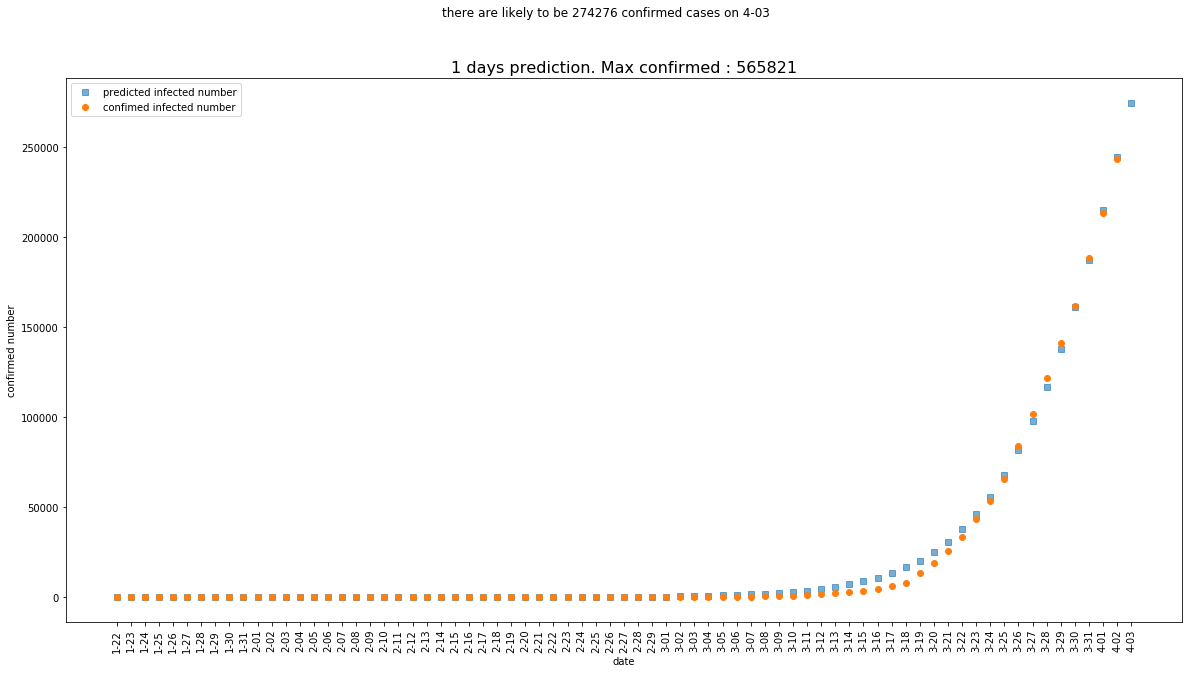

In [139]:
predict(1)